<a href="https://colab.research.google.com/github/jaivardhantiwari/projects/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
knn accuracy is:
0.609375
Random Forest accuracy is:
0.675
Gradient Boosting accuracy is:
0.65
svm accuracy is:
0.625


<ipython-input-5-8ad49f7ff0e9>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1

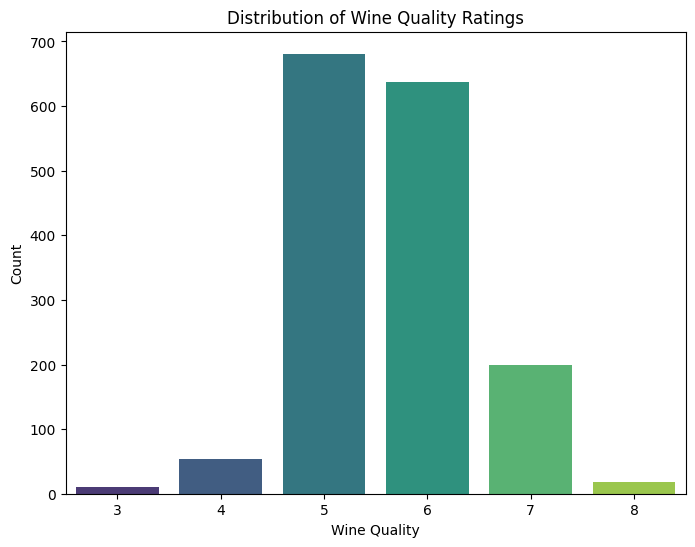

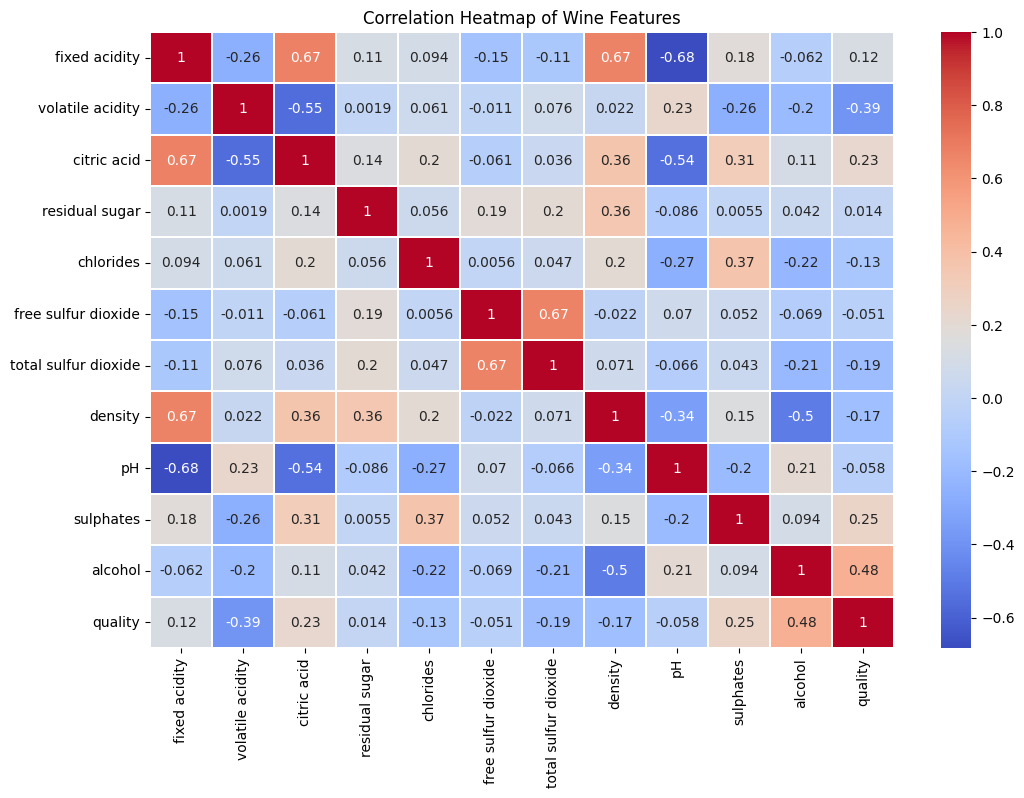

<ipython-input-5-8ad49f7ff0e9>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like

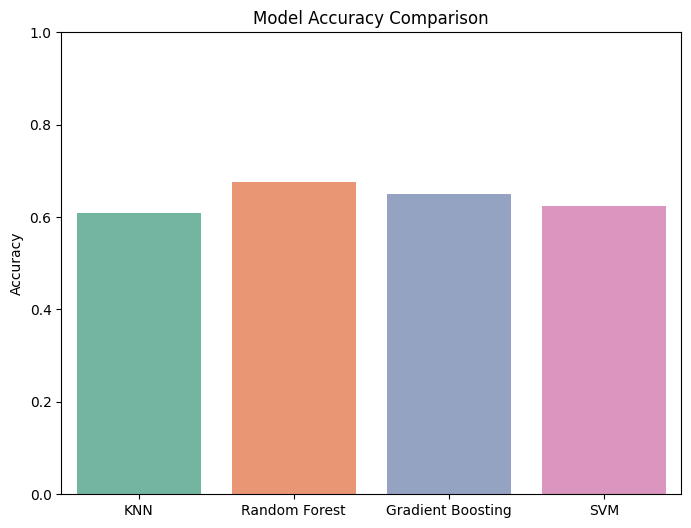

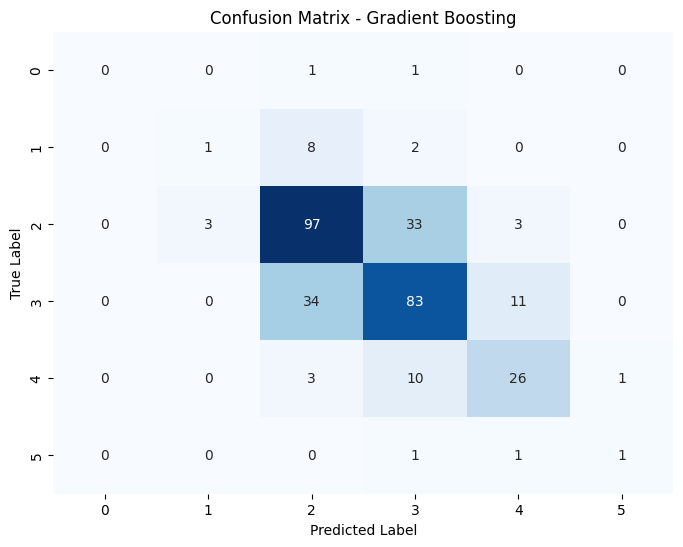

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


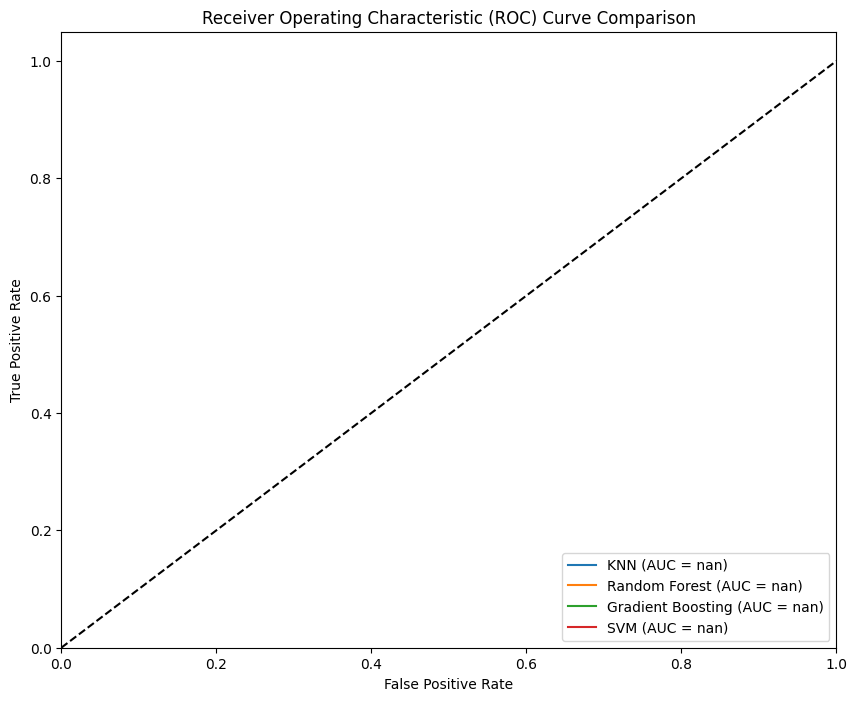

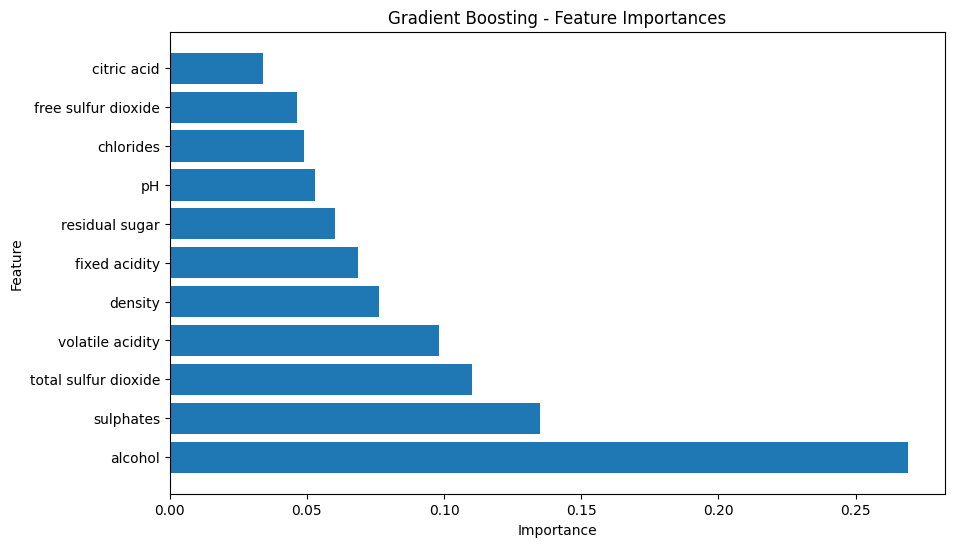

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
import io

# Step 1: Load Dataset
#uploaded = files.upload()
#wine_data = pd.read_csv(io.BytesIO(uploaded['/WineQT.csv']))
wine_data = pd.read_csv('/content/winequality-red.csv')
# Step 2: Check for missing values
print(wine_data.isnull().sum())

# Step 3: Split the data into features and target
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize and Train the Models

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
print("knn accuracy is:")
print(knn_accuracy)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))
print("Random Forest accuracy is:")
print(rf_accuracy)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
gb_accuracy = accuracy_score(y_test, gb.predict(X_test_scaled))
print("Gradient Boosting accuracy is:")
print(gb_accuracy)

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_scaled))
print("svm accuracy is:")
print(svm_accuracy)

# Step 7: Plot graphs

# Plot 1: Distribution of Wine Quality Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

# Plot 2: Correlation Heatmap between features
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

# Plot 3: Comparison of model accuracies
models = ['KNN', 'Random Forest', 'Gradient Boosting', 'SVM']
accuracies = [knn_accuracy, rf_accuracy, gb_accuracy, svm_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot 4: Confusion matrix for the best model (Gradient Boosting in this case)
best_model = gb  # Assuming Gradient Boosting is the best, change this if needed
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot 5: ROC Curve for the models
plt.figure(figsize=(10, 8))

for model, model_name in zip([knn, rf, gb, svm], ['KNN', 'Random Forest', 'Gradient Boosting', 'SVM']):
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# Step 8: Feature importance for Gradient Boosting

def plot_feature_importance(model, X_train, model_name):
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    names = [X.columns[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} - Feature Importances")
    plt.barh(range(X_train.shape[1]), feature_importances[indices], align="center")
    plt.yticks(range(X_train.shape[1]), names)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

plot_feature_importance(gb, X_train, 'Gradient Boosting')


R² Score for KNN: 0.0998
R² Score for Random Forest: 0.3367
R² Score for Gradient Boosting: 0.2623
R² Score for SVM: 0.2690


<ipython-input-8-3460f1938614>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like

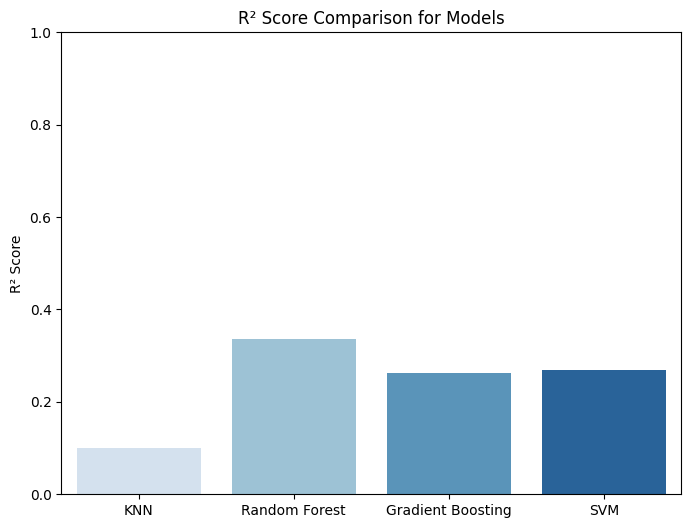

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

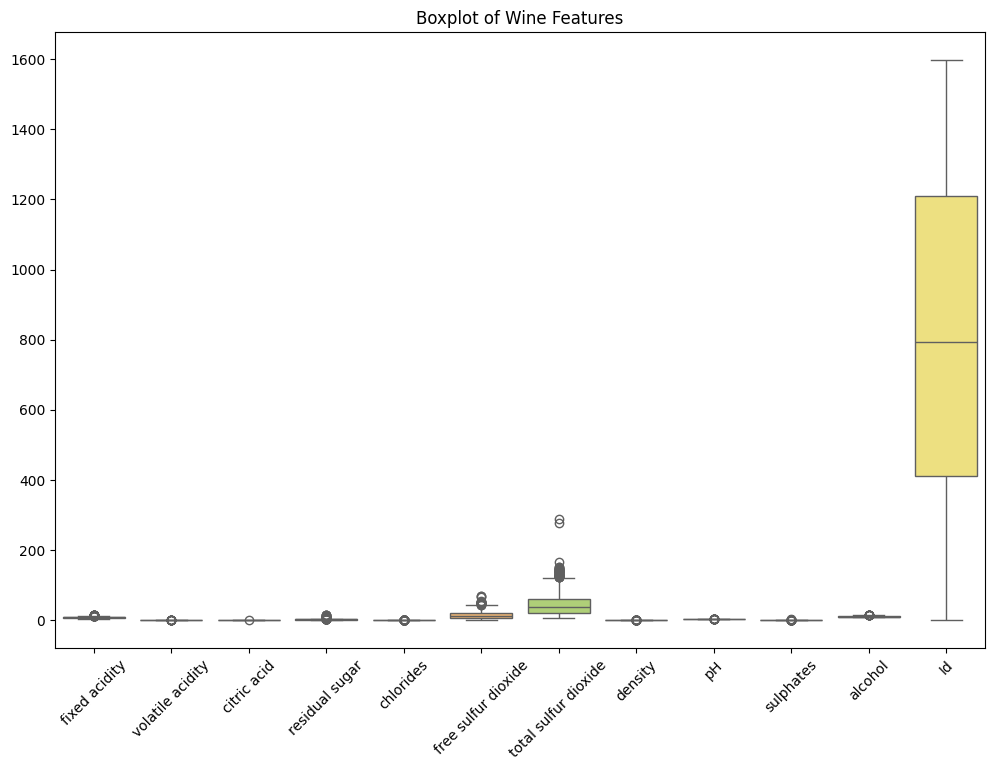

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 1000x1000 with 0 Axes>

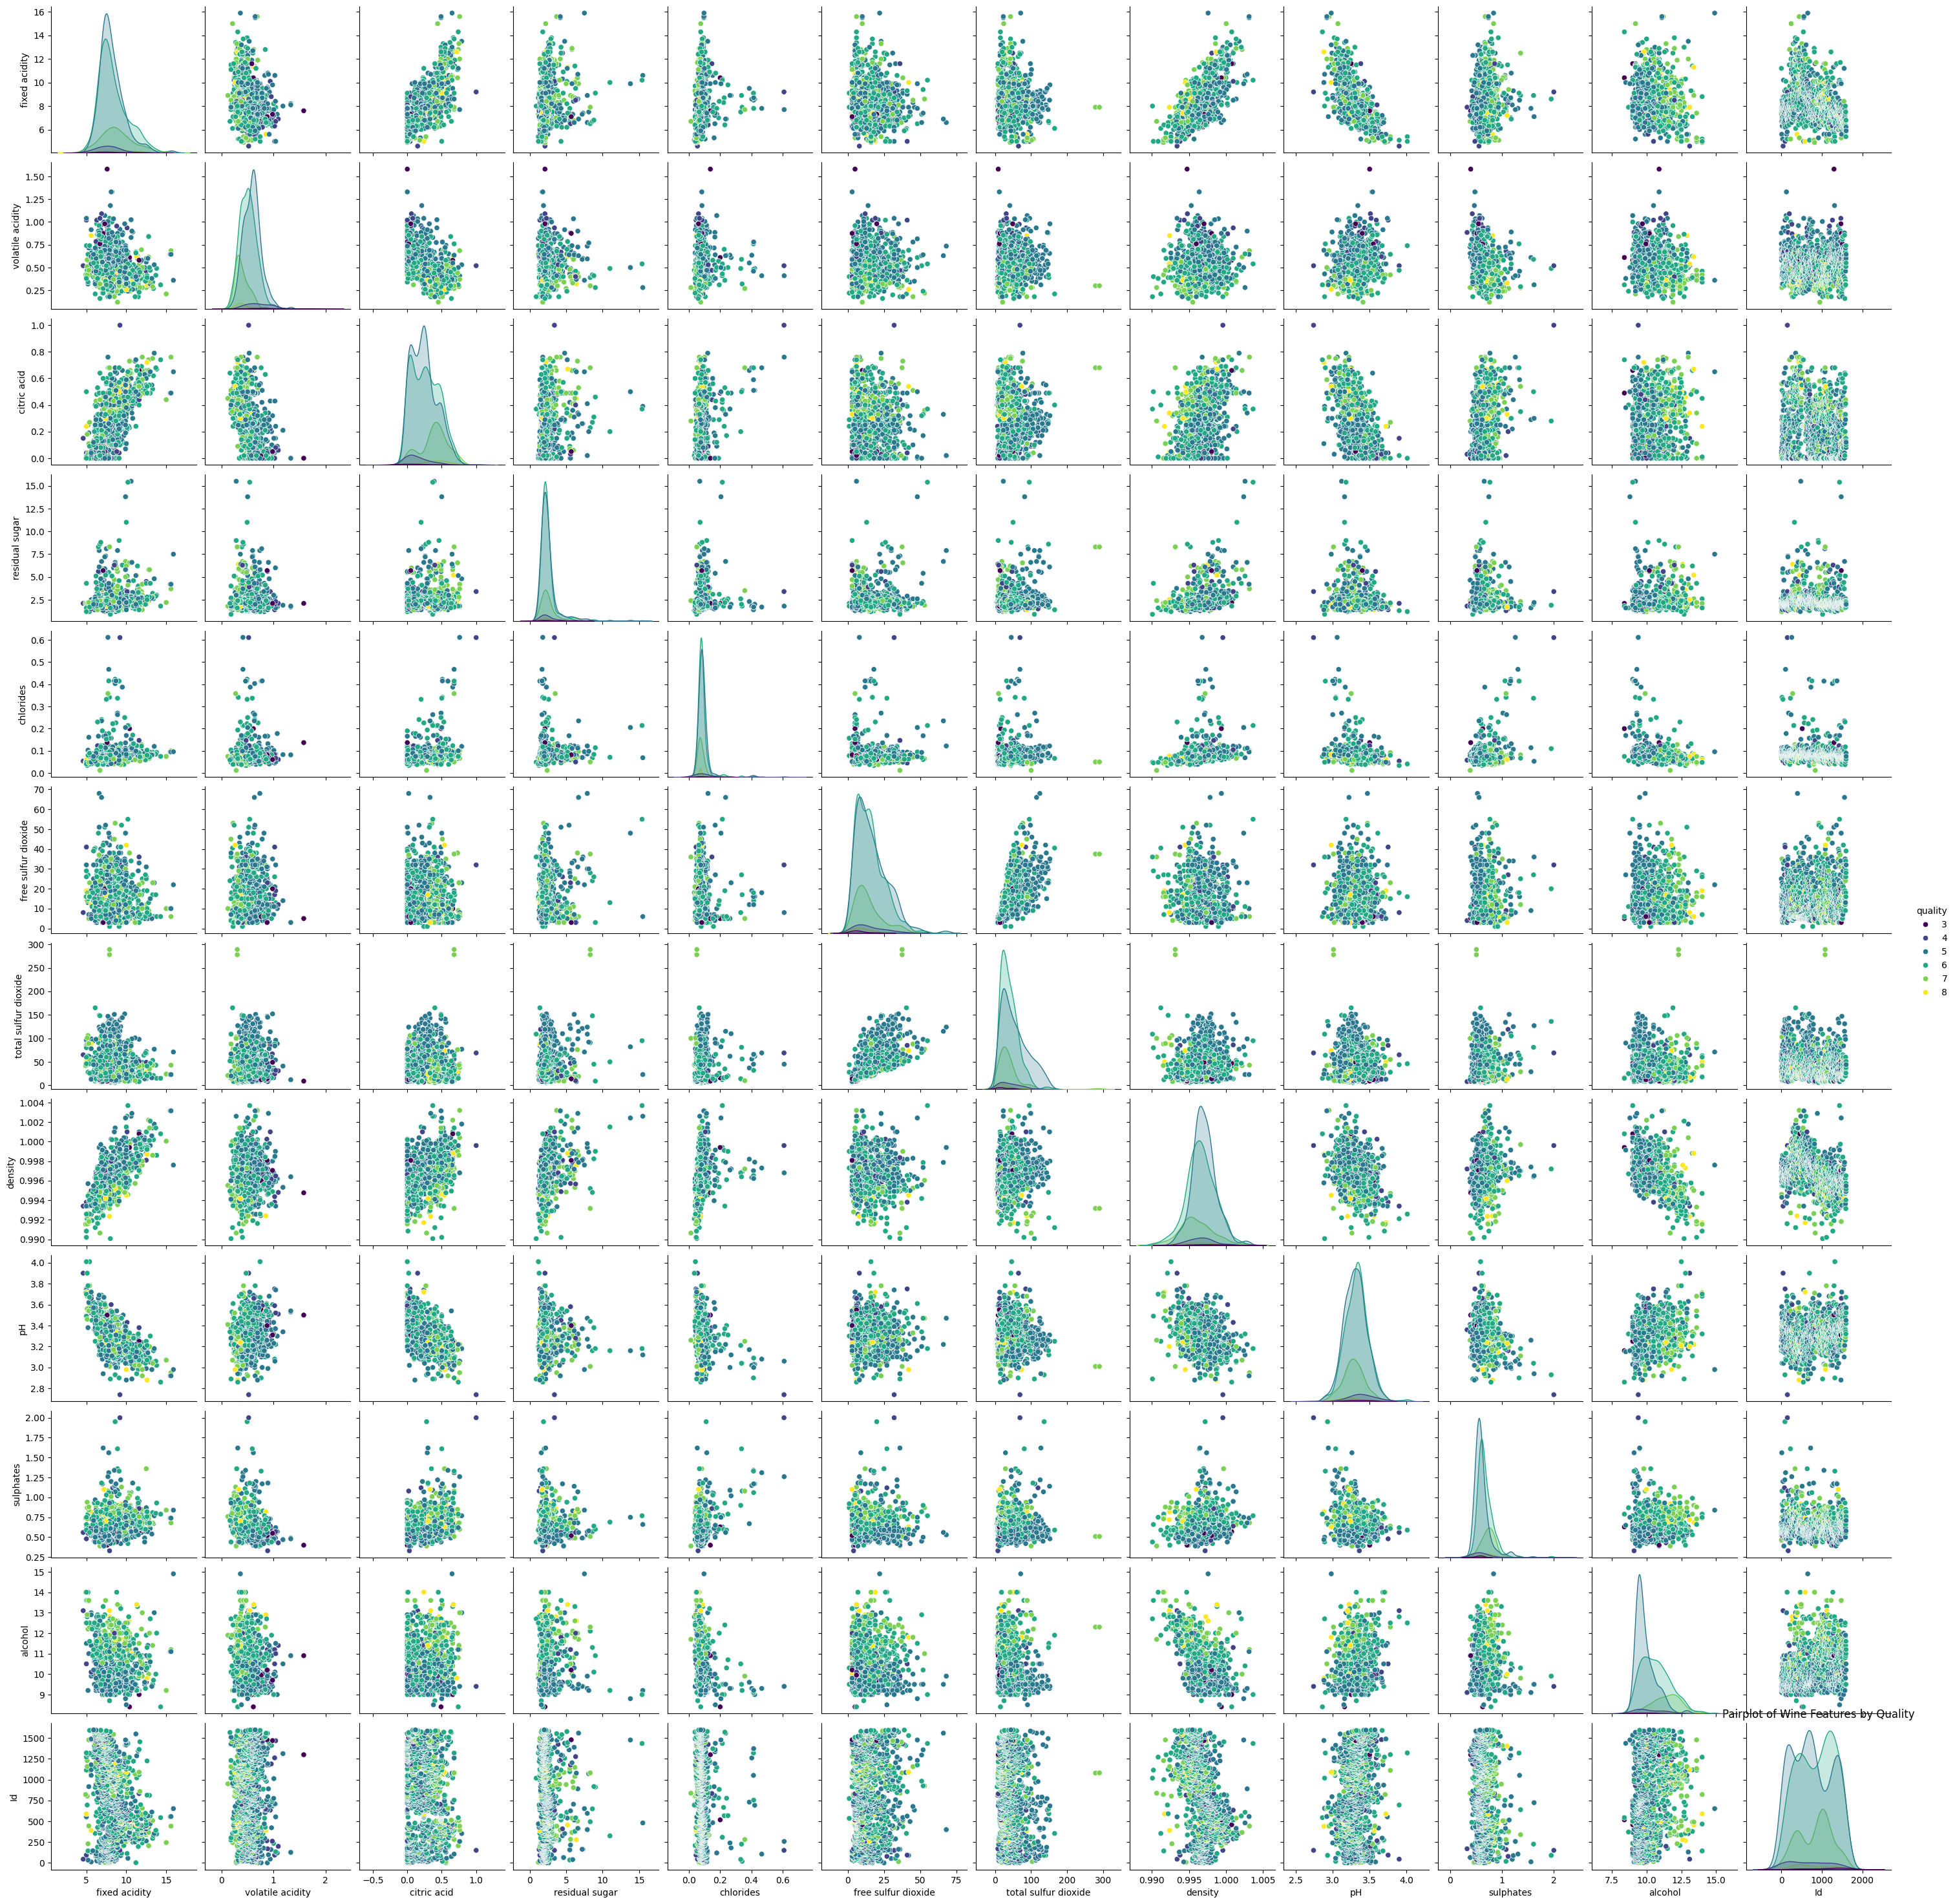

<ipython-input-8-3460f1938614>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=wine_data, palette='Set2')


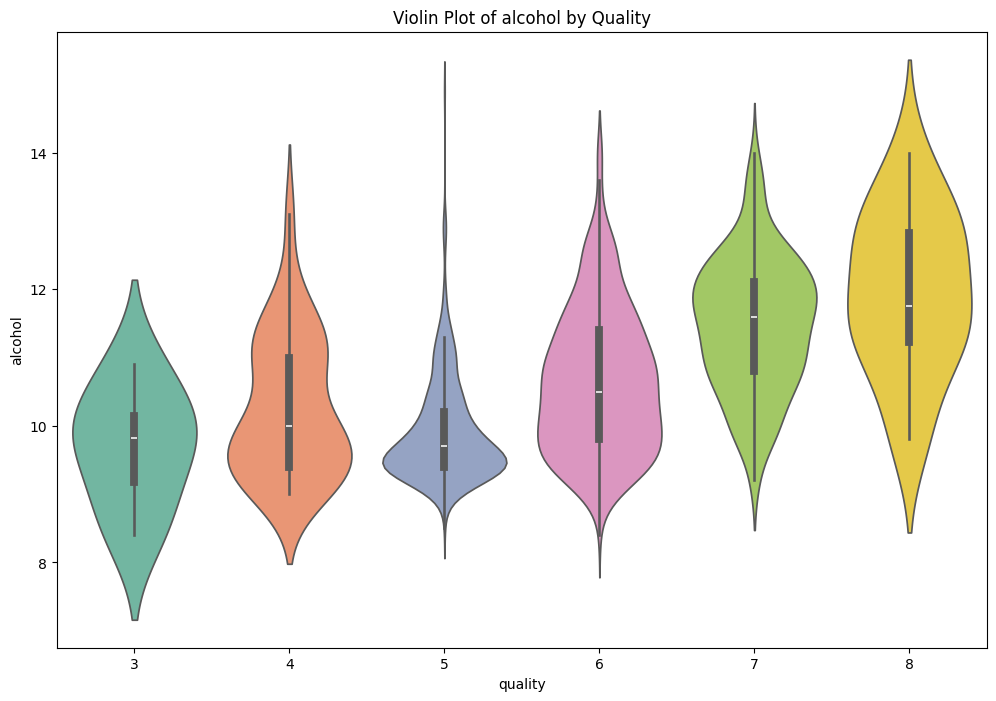

<ipython-input-8-3460f1938614>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=wine_data, palette='Set2')


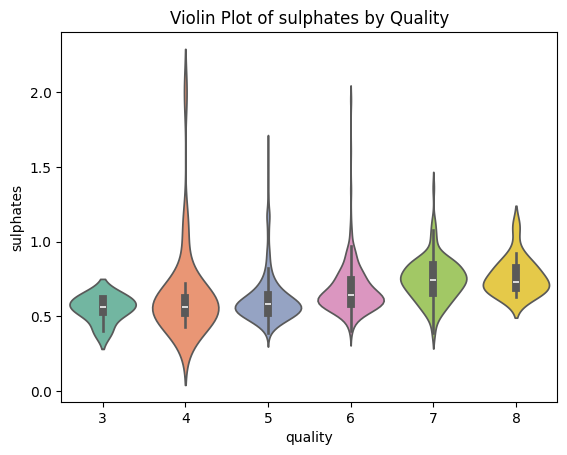

<ipython-input-8-3460f1938614>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y=feature, data=wine_data, palette='Set2')


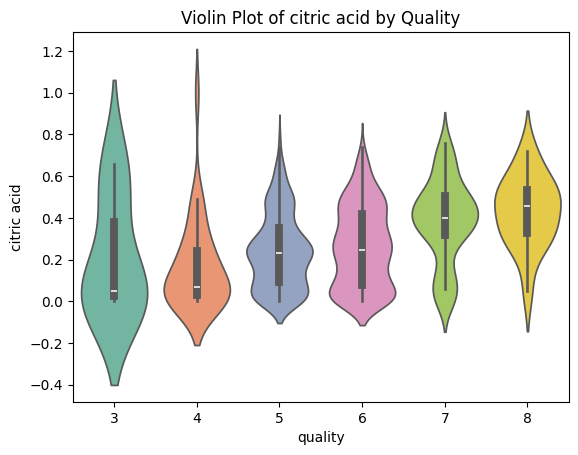

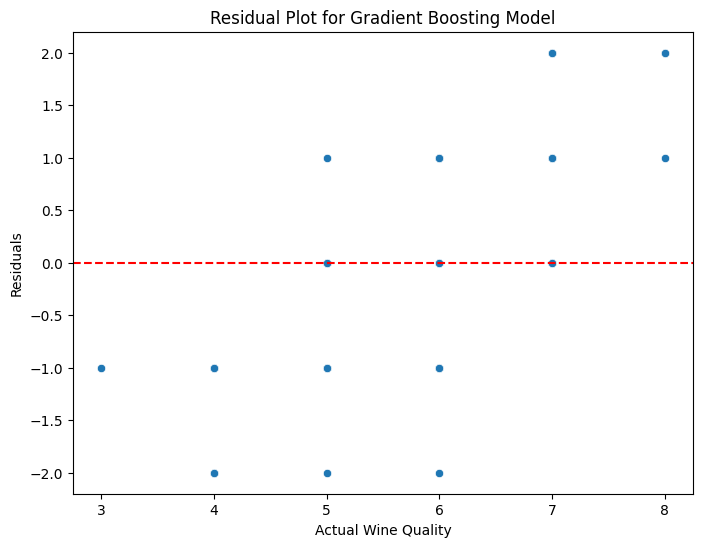

In [ ]:
# Importing necessary libraries for additional plots and metrics
from sklearn.metrics import r2_score

# Step 9: Calculate R² score for each model

# Predict using each model
y_pred_knn = knn.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_gb = gb.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Calculate R² scores
r2_knn = r2_score(y_test, y_pred_knn)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_svm = r2_score(y_test, y_pred_svm)

# Print R² scores
print(f"R² Score for KNN: {r2_knn:.4f}")
print(f"R² Score for Random Forest: {r2_rf:.4f}")
print(f"R² Score for Gradient Boosting: {r2_gb:.4f}")
print(f"R² Score for SVM: {r2_svm:.4f}")

# Step 10: Additional Plots

# Plot 7: R² Score Comparison
r2_scores = [r2_knn, r2_rf, r2_gb, r2_svm]
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=r2_scores, palette='Blues')
plt.title('R² Score Comparison for Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()

# Plot 8: Boxplot of Features (to show feature distributions)
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine_data.drop(columns='quality'), palette='Set3')
plt.title('Boxplot of Wine Features')
plt.xticks(rotation=45)
plt.show()

# Plot 9: Pairplot of Features
plt.figure(figsize=(10, 10))
sns.pairplot(wine_data, diag_kind='kde', hue='quality', palette='viridis')
plt.title('Pairplot of Wine Features by Quality')
plt.show()

# Plot 10: Violin Plot of Features for Top 3 Important Features (based on Gradient Boosting)
top_features = ['alcohol', 'sulphates', 'citric acid']  # Example based on feature importance
plt.figure(figsize=(12, 8))
for feature in top_features:
    sns.violinplot(x='quality', y=feature, data=wine_data, palette='Set2')
    plt.title(f'Violin Plot of {feature} by Quality')
    plt.show()

# Plot 11: Residual Plot for Gradient Boosting Model
residuals = y_test - y_pred_gb
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for Gradient Boosting Model')
plt.xlabel('Actual Wine Quality')
plt.ylabel('Residuals')
plt.show()

# Now combine this with the previous code to run everything together
